<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/pp%20yolo%20train%2011%20july.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#GPU
#!python -m pip install paddlepaddle-gpu==2.1.1.post101 -f https://www.paddlepaddle.org.cn/whl/mkl/stable.html
!python3 -m pip install paddlepaddle-gpu==2.1.0
#CPU
#!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

     |████████████████████████████████| 349.2MB 51kB/s 


In [3]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle works well on 1 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [4]:
!python -c "import paddle; print(paddle.__version__)"

2.1.0


In [ ]:
!pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 419kB 292kB/s 
     |█▊                              | 143kB 3.5MB/s eta 0:00:01

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

In [ ]:
%cd /content/PaddleDetection

In [8]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating paddledet.egg-info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
writing manifest file 'paddledet.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppdet
copying ppdet/optimizer.py -> build/lib/ppdet
copying ppdet/__init__.py -> build/lib/ppdet
creating build/lib/ppdet/data
copying ppdet/data/reader.py -> build/lib/ppdet/data
copying ppdet/data/shm_utils.py -> build/lib/ppdet/data
copying ppdet/data/__init__.py -> build/lib/ppdet/data
creating build/lib/ppdet/model_zoo
copying ppdet/model_zoo/model_zoo.py -> build/lib/ppdet/model_zoo
copying ppdet/model_zoo

In [9]:
!pip install -r requirements.txt
%cd /content/

/content


In [10]:
!cp -r /content/drive/MyDrive/COCO_annotations /content/
!cp /content/drive/MyDrive/updated_data.zip /content/
!unzip updated_data.zip

Archive:  updated_data.zip
   creating: content/data/
  inflating: content/data/train.txt  
   creating: content/data/obj/
  inflating: content/data/obj/COCO_train2014_000000303133.jpg  
  inflating: content/data/obj/COCO_train2014_000000475763.jpg  
  inflating: content/data/obj/COCO_train2014_000000115342.txt  
  inflating: content/data/obj/COCO_train2014_000000114732.jpg  
  inflating: content/data/obj/COCO_train2014_000000565444.jpg  
  inflating: content/data/obj/COCO_train2014_000000483956.txt  
  inflating: content/data/obj/COCO_train2014_000000524881.txt  
  inflating: content/data/obj/COCO_train2014_000000106799.txt  
  inflating: content/data/obj/COCO_train2014_000000057663.jpg  
  inflating: content/data/obj/COCO_train2014_000000049801.jpg  
  inflating: content/data/obj/COCO_train2014_000000131245.txt  
  inflating: content/data/obj/COCO_train2014_000000385448.txt  
  inflating: content/data/obj/COCO_train2014_000000541327.txt  
  inflating: content/data/obj/COCO_train2014_

In [12]:
!mkdir /content/annos
!move /content/content/data/obj/*.txt /content/annos
%cd /content/PaddleDetection
!python /content/PaddleDetection/tools/train.py -c /content/PaddleDetection/configs/ppyolo/ppyolo_r50vd_dcn_2x_coco.yml -r /content/drive/MyDrive/10_July/ppyolo_r50vd_dcn_2x_coco/299

mkdir: cannot create directory ‘/content/annos’: File exists
/bin/bash: move: command not found
/content/PaddleDetection
/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
W0711 07:12:11.421903   592 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.2, Runtime API Version: 10.2
W0711 07:12:11.426946   592 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[07/11 07:12:18] ppdet.utils.checkpoint INFO: Finish resuming model wei

In [13]:
!python tools/infer.py -c /content/PaddleDetection/configs/ppyolo/ppyolo_r50vd_dcn_2x_coco.yml --infer_img=/content/drive/MyDrive/umbrella/COCO_train2014_000000025058.jpg -o weights=/content/drive/MyDrive/11_July/ppyolo_r50vd_dcn_2x_coco/model_final.pdparams use_gpu=true --draw_threshold=0.01

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
W0711 10:06:04.041846  3744 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.2, Runtime API Version: 10.2
W0711 10:06:04.088927  3744 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[07/11 10:06:08] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/11_July/ppyolo_r50vd_dcn_2x_coco/model_final.pdparams
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[07/11 10:06:08] ppdet.engine INFO: Det

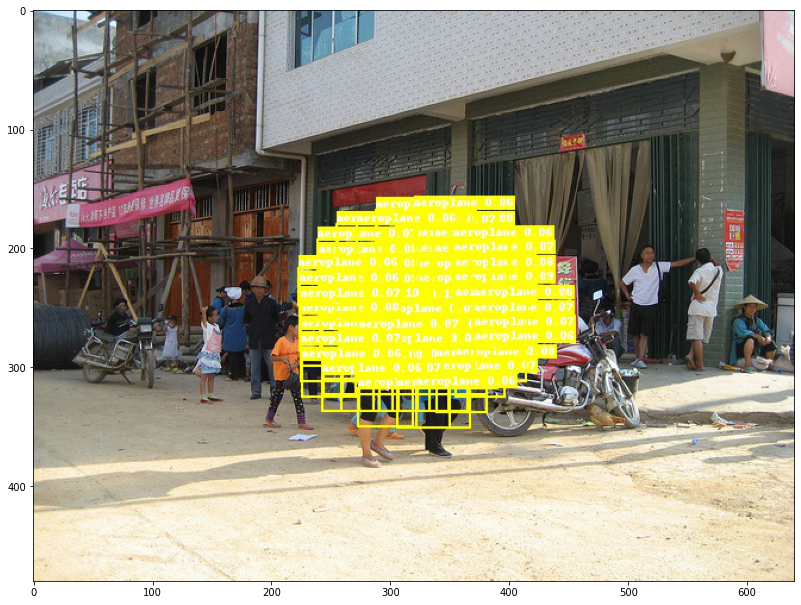

In [14]:
import matplotlib.pyplot as plt
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(plt.imread('/content/PaddleDetection/output/COCO_train2014_000000025058.jpg'))

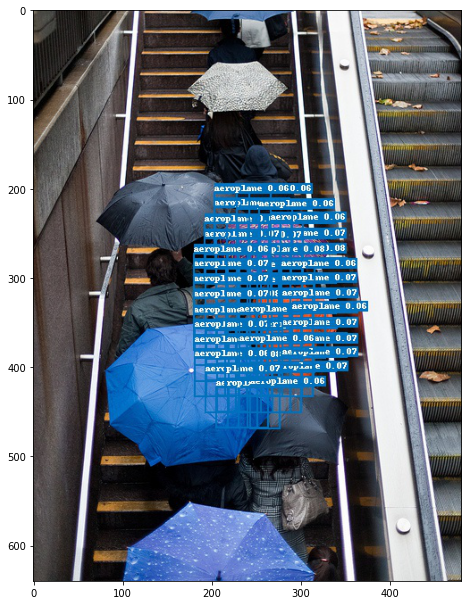

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(plt.imread('/content/PaddleDetection/output/COCO_train2014_000000041008.jpg'))